In [ ]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [ ]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [ ]:
#Load preprocess data
AE3= np.array(pd.read_csv ('../data/processed_data/AE3.csv'))
y = np.array(AE3[:,-1],dtype=int)
AE3 = AE3[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3,y)

In [5]:
print(AE3.shape, len(pred))
acc = model.score_
print(acc, model.recovery)

(333, 11894) 333
0.42011834319526625 0.6726726726726727


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (71, 98, 0.7244897959183674, 0.6635514018691588, 0.9943574389682174, 0.42011834319526625, 0.9979197966023344, 0.5798816568047337, 0.3364485981308411)


# Mutual information maximizer (MIM)

test 0.6910975072052308 0.06561578649833269
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (140, 73, 1.917808219178082, 0.7526881720430108, 0.9958002531354274, 0.6572769953051644, 0.9973494670123884, 0.3427230046948357, 0.24731182795698925)


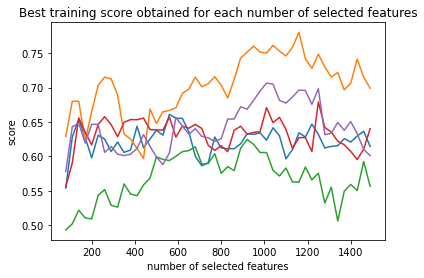

In [7]:
#Define parameters for MIM method
N = np.arange(80,1500,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_RI,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

In [8]:
get_best_genes_names(subset, '../data/processed_data/AE3genes_interest.csv', '../data/optimized_subsets/AE3genes_bestMIM.csv')

# Anova F test

test 0.6508889175670781 0.14339330032779282
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (131, 77, 1.7012987012987013, 0.7891566265060241, 0.9955125590069351, 0.6298076923076923, 0.9979552491674943, 0.3701923076923077, 0.21084337349397592)
1540


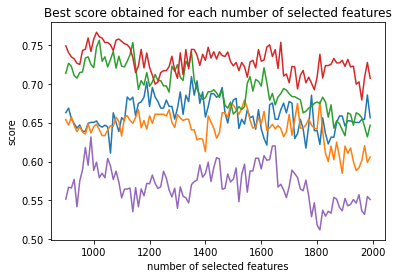

In [5]:
#Define parameters for ANOVA method
N = np.arange(900,2000,10)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    
print(len(subset))

In [6]:
get_best_genes_names(subset, '../data/processed_data/AE3genes_interest.csv', '../data/optimized_subsets/AE3genes_bestANOVA.csv')

# Hybrid methods

# Mutual information and stimulated annealing

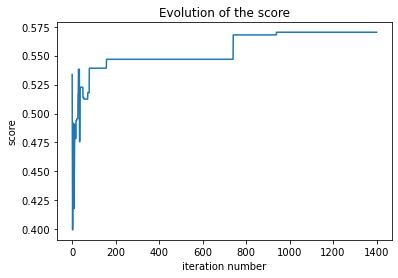

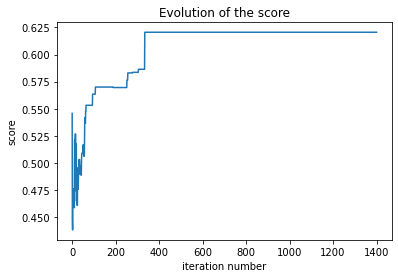

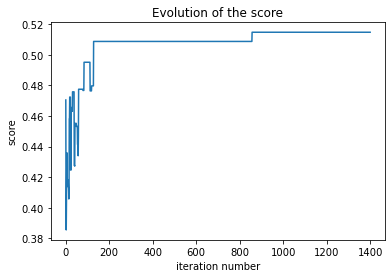

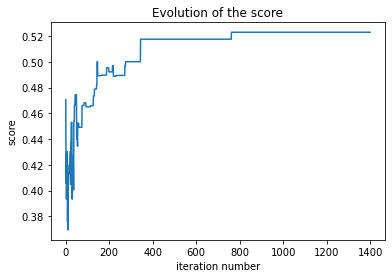

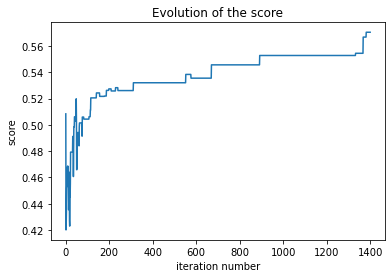

test 0.5541365832235396 0.07974733751701092
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (194.0, 237.0, 0.8185654008438819, 0.749034749034749, 0.9823647592826847, 0.45011600928074247, 0.9951006256124219, 0.5498839907192575, 0.25096525096525096)


In [9]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [10]:
#Define parameters for MI + genetic algorithm method
N = np.array([700])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

KeyboardInterrupt: 